### Retail Price Optimization using Machine Learning

In  this  machine  learning  pricing  project,  implement  a retail   price   optimization   algorithm   using   regression trees. This is one of the first steps to building a dynamic pricing model.Pricing a productis a crucial aspect in any business. Alot of  thought  process  is  put  into  it.  There  are  different strategies to price different kinds of products.
There are products whose sales are quite sensitive to their prices and  as  such  a  small  change  in  their  price  can  lead  to noticeable   change   in   their sales.   While   there   are products  whose  sales  are  not  much  affected  by  their price-these tend to be either luxury items or necessities (like  certain  medicines).  This  machine  learning  retail price optimization project will focus on the former type ofproducts. 

Price  elasticity  of  demand  (Epd),  or  elasticity,  is  the degree  to  which  the  effective  desire  for  something changes  as  its  price  changes.  In  general,  people  desire things  less  as  those  things  become  more  expensive. However,   for  some  products,  the  customers  desire could drop sharply even with a little price increase, and for other products, it could stay almost the same even with  a  big  price  increase.  Economists  use  the  term elasticity  to  denote  this  sensitivity  to  price  increases. More  precisely,  price elasticity  gives  the  percentage change  in  quantity  demanded  when  there  is  a  one percent   increase   in   price,   holding   everything   else constant.

In this machine learning pricing optimization case study, we will take the data of a cafe and based on their past sales,  identify  the  optimal  prices  for  their  items  based on the price  elasticity of the items. For  each item,  first the  price  elasticity  will  be  calculated  and  then  the optimal  price  will be figured.  

This analysis helps us understand  how  customers  will  react  to  different pricing  strategies   for   products   and   services,   i.e., understanding the elasticity of the demand thus in finding the best prices for a iven company,considering its goals. Pricing systems have evolved since the early 1970s until now, from applying very simple strategies, such as a standard markup to base cost, to being capable of predicting the demand of products or services and finding the best price to achieve the setKPI.Price optimization techniques can help retailers evaluate the potential impact of sales promotions or estimate the right price for each product if they want to sell it in a certain period of time.

Modules: 
Competition 
Weather Season
Special events / holidays 
Macroeconomic variables 
Operating costs 
Warehouse information

To determine:
The initial price 
The best  price 
The discountprice
The promotional price

Details: https://towardsdatascience.com/price-elasticity-data-understanding-and-data-exploration-first-of-all-ae4661da2ecb

Datasets:https://onedrive.live.com/?authkey=%21AHDkRFUvt4FI8Wc&cid=7BA8848FE0992BD8&id=7BA8848FE0992BD8%21278810&parId=7BA8848FE0992BD8%21195633&action=locate

Datasets Used:  We have used three data sets in the form of CSV files: CafeTransactionStore.csv, CafeMetaData.csv and DateInfo.csv. This data is from the transactions of a Burger Cafè in the Microsoft building in China. 
The owner of the cafe wants to know how change in prices of the burgers effects their demand among the consumers. This effect of price change on the demand of a product is called as "Price Elasticity" and it helps in deciding the right price of a product. 

We do some data exploration to understand the data - Variable Identification, Univariate Analysis, Bi-variate Analysis, Missing values treatment, Outlier treatment,Variable transformation, Variable / Feature creation

Variables in 3 data files: 

1. CafeTransactionStore.csv

STORE: a categorical variable that gives identifier of the store, value is '1'

CALENDAR_DATE: a date/time variable, here the time is fixed to 00:00 AM

PRICE: a numeric variable, gives the price of the product, product is identified by the SELL_ID

QUANTITY: a numeric variable, the quantity of the product sold, product is identified by the SELL_ID

SELL_ID: a categorical variable, identifier of the product sold

SELL_CATEGORY: a categorical variable, category of the product sold

2. CafeMetaData.csv 

SELL_ID: identifier of the product sold, it is present in CafeTransactionStore.csv also. 

SELL_CATEGORY:  category of the product sold, it is present in CafeTransactionStore.csv also. The category '0' means single products, category '2' means the combo products

ITEM_ID: a categorical variable, identifier of the item that is contained in the product

ITEM_NAME: a categorical variable, identifying the name of the item

3. DateInfo.csv 

CALENDAR_DATE: a date/time variable, indicating the date of a calendar

YEAR: a numeric variable, indicating the year of the corresponding CALENDAR_DATE

HOLIDAY: a categorical variable, indicating if the corresponding CALENDAR_DATE is a holiday

IS_WEEKEND: a categorical variable, indicating if the corresponding CALENDAR_DATE is a weekend

IS_SCHOOLBREAK: a categorical variable, indicating if the corresponding CALENDAR_DATE is a school break

AVERAGE_TEMPERATURE: a numeric variable, indicating the average temperature in Fahrenheit of the corresponding CALENDAR_DATE day

IS_OUTDOOR: a categorical variable, '1' if the temperature is the measured outside, '0' if temperature is measured inside the building


## References and Source Credits
- 1. https://github.com/sukesh-reddy/Retail-Price-Optimization-
- 2. http://datapandas.com/index.php/2016/11/02/decision-tree-price-optimisation-regression-tree/
- 3. https://github.com/benadaba/Price-Optimisation/blob/5ed6ab513786efded873b829d58ae28b36dad502/Price-Optimisation.py
- 4. https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
- 5. https://github.com/benadaba/Price-Optimisation
- 6. https://github.com/SoftServeSAG/retail_price_analytics

In [1]:
# Import the reqiured libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
transactions = pd.read_csv('CafeTransactionStore.csv')
items = pd.read_csv('CafeMetaData.csv')
dates = pd.read_csv('DateInfo.csv')

In [3]:
transactions.head()

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,1,1/1/12,15.50,46,1070,0
1,1,1/1/12,12.73,22,2051,2
2,1,1/1/12,12.75,18,2052,2
3,1,1/1/12,12.60,30,2053,2
4,1,1/2/12,15.50,70,1070,0


In [4]:
transactions.STORE.unique()

array([1], dtype=int64)

In [5]:
transactions = transactions.drop('STORE', axis = 1)

In [6]:
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,1/1/12,15.50,46,1070,0
1,1/1/12,12.73,22,2051,2
2,1/1/12,12.75,18,2052,2
3,1/1/12,12.60,30,2053,2
4,1/2/12,15.50,70,1070,0


In [7]:
items.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [8]:
dates.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [9]:
print(transactions.shape)
print(items.shape)
print(dates.shape)

(5404, 5)
(11, 4)
(1349, 7)


In [10]:
print(transactions.isna().sum(), "\n")
print(items.isna().sum(),"\n")
print(dates.isna().sum())

CALENDAR_DATE    0
PRICE            0
QUANTITY         0
SELL_ID          0
SELL_CATEGORY    0
dtype: int64 

SELL_ID          0
SELL_CATEGORY    0
ITEM_ID          0
ITEM_NAME        0
dtype: int64 

CALENDAR_DATE             0
YEAR                      0
HOLIDAY                1244
IS_WEEKEND                0
IS_SCHOOLBREAK            0
AVERAGE_TEMPERATURE       0
IS_OUTDOOR                0
dtype: int64


In [11]:
transactions = transactions.dropna()
items = items.dropna()
dates = dates.dropna()

In [12]:
print(transactions.isna().sum(), "\n")
print(items.isna().sum(),"\n")
print(dates.isna().sum())

CALENDAR_DATE    0
PRICE            0
QUANTITY         0
SELL_ID          0
SELL_CATEGORY    0
dtype: int64 

SELL_ID          0
SELL_CATEGORY    0
ITEM_ID          0
ITEM_NAME        0
dtype: int64 

CALENDAR_DATE          0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
dtype: int64


In [13]:
print(transactions.dtypes, "\n")
print(items.dtypes, "\n")
print(dates.dtypes, "\n")

CALENDAR_DATE     object
PRICE            float64
QUANTITY           int64
SELL_ID            int64
SELL_CATEGORY      int64
dtype: object 

SELL_ID           int64
SELL_CATEGORY     int64
ITEM_ID           int64
ITEM_NAME        object
dtype: object 

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object 



In [14]:
transactions['SELL_ID'].unique()

array([1070, 2051, 2052, 2053], dtype=int64)

In [15]:
items['SELL_ID'].unique()

array([1070, 3055, 3067, 3028, 2051, 2052, 2053], dtype=int64)

In [16]:
print(transactions.columns)
print(items.columns)
print(dates.columns)

Index(['CALENDAR_DATE', 'PRICE', 'QUANTITY', 'SELL_ID', 'SELL_CATEGORY'], dtype='object')
Index(['SELL_ID', 'SELL_CATEGORY', 'ITEM_ID', 'ITEM_NAME'], dtype='object')
Index(['CALENDAR_DATE', 'YEAR', 'HOLIDAY', 'IS_WEEKEND', 'IS_SCHOOLBREAK',
       'AVERAGE_TEMPERATURE', 'IS_OUTDOOR'],
      dtype='object')


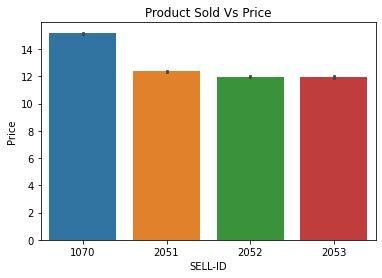

In [17]:
sns.barplot(x="SELL_ID", y="PRICE", data=transactions)
plt.title('Product Sold Vs Price')
plt.xlabel('SELL-ID')
plt.ylabel('Price')
plt.show()

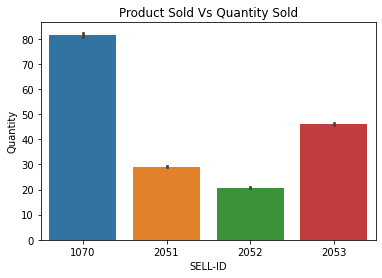

In [18]:
sns.barplot(x="SELL_ID", y="QUANTITY", data=transactions)
plt.title('Product Sold Vs Quantity Sold')
plt.xlabel('SELL-ID')
plt.ylabel('Quantity')
plt.show()

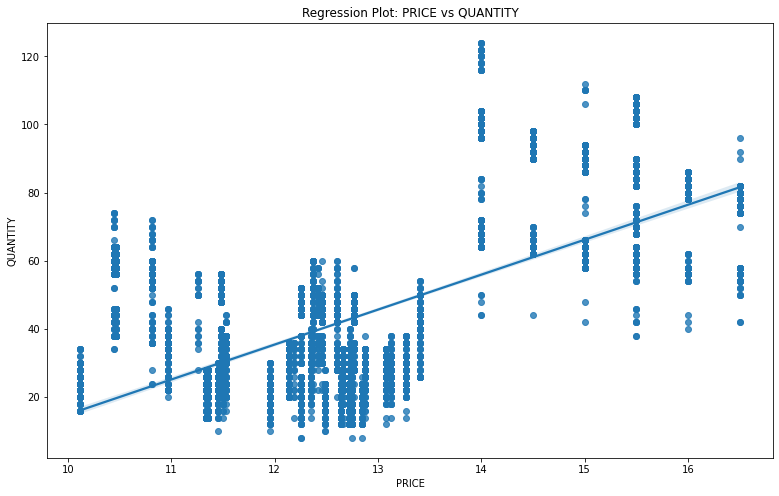

In [19]:
plt.rcParams["figure.figsize"] = (13, 8)
scat1 = sns.regplot(x="PRICE", y="QUANTITY",   data=transactions)
plt.title('Regression Plot: PRICE vs QUANTITY')
plt.xlabel('PRICE')
plt.ylabel('QUANTITY')
plt.show()

In [20]:
transactions.columns

Index(['CALENDAR_DATE', 'PRICE', 'QUANTITY', 'SELL_ID', 'SELL_CATEGORY'], dtype='object')

In [21]:
transactions.SELL_CATEGORY.unique()

array([0, 2], dtype=int64)

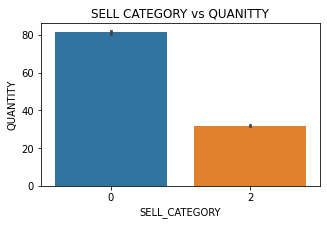

In [22]:
plt.rcParams["figure.figsize"] = (5, 3)
scat2 = sns.barplot(x="SELL_CATEGORY", y="QUANTITY", data=transactions)
plt.title('SELL CATEGORY vs QUANITTY')
plt.xlabel('SELL_CATEGORY')
plt.ylabel('QUANTITY')
plt.show()

In [23]:
tr_dates = pd.merge(transactions, dates, how='inner', on = 'CALENDAR_DATE')
tr_dates.shape

(420, 11)

In [24]:
tr_dates.isna().sum()

CALENDAR_DATE          0
PRICE                  0
QUANTITY               0
SELL_ID                0
SELL_CATEGORY          0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
dtype: int64

In [25]:
dates.isna().sum()

CALENDAR_DATE          0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
dtype: int64

In [26]:
tr_items_dates = pd.merge(tr_dates, items, how = 'inner', on = 'SELL_ID')
tr_items_dates.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY_x,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_CATEGORY_y,ITEM_ID,ITEM_NAME
0,1/1/12,15.5,46,1070,0,2012,New Year,1,0,24.8,0,0,7821,BURGER
1,1/2/12,15.5,70,1070,0,2012,New Year,0,0,24.8,0,0,7821,BURGER
2,1/3/12,15.5,62,1070,0,2012,New Year,0,0,32.0,1,0,7821,BURGER
3,2/2/12,15.5,64,1070,0,2012,Luner New Year,0,0,32.0,1,0,7821,BURGER
4,2/3/12,15.5,62,1070,0,2012,Luner New Year,0,0,32.0,1,0,7821,BURGER


In [27]:
tr_items_dates.isna().sum()

CALENDAR_DATE          0
PRICE                  0
QUANTITY               0
SELL_ID                0
SELL_CATEGORY_x        0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
SELL_CATEGORY_y        0
ITEM_ID                0
ITEM_NAME              0
dtype: int64

In [28]:
tr_items_dates.dropna(how='any')

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY_x,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,SELL_CATEGORY_y,ITEM_ID,ITEM_NAME
0,1/1/12,15.50,46,1070,0,2012,New Year,1,0,24.8,0,0,7821,BURGER
1,1/2/12,15.50,70,1070,0,2012,New Year,0,0,24.8,0,0,7821,BURGER
2,1/3/12,15.50,62,1070,0,2012,New Year,0,0,32.0,1,0,7821,BURGER
3,2/2/12,15.50,64,1070,0,2012,Luner New Year,0,0,32.0,1,0,7821,BURGER
4,2/3/12,15.50,62,1070,0,2012,Luner New Year,0,0,32.0,1,0,7821,BURGER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,9/4/15,11.26,28,2053,2,2015,WWII Celebration,0,0,77.0,1,2,5030,COKE
836,9/4/15,11.26,28,2053,2,2015,WWII Celebration,0,0,77.0,1,2,3052,COFFEE
837,9/5/15,11.26,40,2053,2,2015,WWII Celebration,1,0,75.2,1,2,7821,BURGER
838,9/5/15,11.26,40,2053,2,2015,WWII Celebration,1,0,75.2,1,2,5030,COKE


In [29]:
tr_items_dates.isna().sum()

CALENDAR_DATE          0
PRICE                  0
QUANTITY               0
SELL_ID                0
SELL_CATEGORY_x        0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
SELL_CATEGORY_y        0
ITEM_ID                0
ITEM_NAME              0
dtype: int64

In [30]:
tr_items_dates['YEAR'] = tr_items_dates['YEAR'].astype(int)

In [31]:
tr_items_dates.dtypes

CALENDAR_DATE           object
PRICE                  float64
QUANTITY                 int64
SELL_ID                  int64
SELL_CATEGORY_x          int64
YEAR                     int32
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
SELL_CATEGORY_y          int64
ITEM_ID                  int64
ITEM_NAME               object
dtype: object

In [32]:
tr_items_dates = tr_items_dates.drop(['SELL_CATEGORY_x', 'SELL_CATEGORY_y'], axis = 1)

In [33]:
tr_items_dates.columns

Index(['CALENDAR_DATE', 'PRICE', 'QUANTITY', 'SELL_ID', 'YEAR', 'HOLIDAY',
       'IS_WEEKEND', 'IS_SCHOOLBREAK', 'AVERAGE_TEMPERATURE', 'IS_OUTDOOR',
       'ITEM_ID', 'ITEM_NAME'],
      dtype='object')

In [34]:
tr_items_dates = tr_items_dates.drop(['AVERAGE_TEMPERATURE', 'IS_OUTDOOR','ITEM_ID'], axis = 1)

In [35]:
tr_items_dates = tr_items_dates.drop(['IS_WEEKEND', 'IS_SCHOOLBREAK'], axis = 1)

In [36]:
tr_items_dates.ITEM_NAME.unique()

array(['BURGER', 'COKE', 'LEMONADE', 'COFFEE'], dtype=object)

In [37]:
tr_items_dates.YEAR.unique()

array([2012, 2013, 2014, 2015])

In [38]:
tr_items_dates.columns

Index(['CALENDAR_DATE', 'PRICE', 'QUANTITY', 'SELL_ID', 'YEAR', 'HOLIDAY',
       'ITEM_NAME'],
      dtype='object')

In [39]:
itemwisegroups = tr_items_dates.groupby(['ITEM_NAME'])
print(itemwisegroups.groups.keys())


dict_keys(['BURGER', 'COFFEE', 'COKE', 'LEMONADE'])


In [40]:
burgersdata = itemwisegroups.get_group('BURGER')
coffeedata = itemwisegroups.get_group('COFFEE')
cokedata = itemwisegroups.get_group('COKE')
lemonadedata = itemwisegroups.get_group('LEMONADE')

#[itemwisegroups.get_group(x) for x in itemwisegroups.groups]

In [41]:
burgersdata.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,YEAR,HOLIDAY,ITEM_NAME
0,1/1/12,15.5,46,1070,2012,New Year,BURGER
1,1/2/12,15.5,70,1070,2012,New Year,BURGER
2,1/3/12,15.5,62,1070,2012,New Year,BURGER
3,2/2/12,15.5,64,1070,2012,Luner New Year,BURGER
4,2/3/12,15.5,62,1070,2012,Luner New Year,BURGER


In [42]:
coffeedata.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,YEAR,HOLIDAY,ITEM_NAME
527,1/1/12,12.6,30,2053,2012,New Year,COFFEE
530,1/2/12,12.6,34,2053,2012,New Year,COFFEE
533,1/3/12,12.6,28,2053,2012,New Year,COFFEE
536,2/2/12,12.6,34,2053,2012,Luner New Year,COFFEE
539,2/3/12,12.6,32,2053,2012,Luner New Year,COFFEE


<AxesSubplot:xlabel='QUANTITY', ylabel='PRICE'>

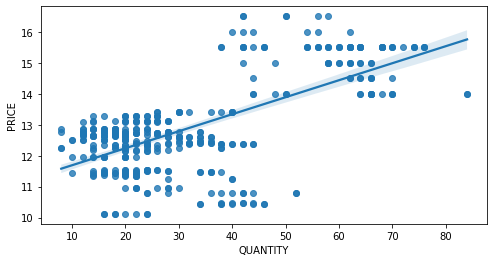

In [43]:
plt.rcParams["figure.figsize"] = (8, 4)
sns.regplot(data = burgersdata, x = 'QUANTITY', y = 'PRICE')

In [44]:
cokedata.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,YEAR,HOLIDAY,ITEM_NAME
106,1/1/12,12.73,22,2051,2012,New Year,COKE
108,1/2/12,12.73,22,2051,2012,New Year,COKE
110,1/3/12,12.73,26,2051,2012,New Year,COKE
112,2/2/12,12.73,18,2051,2012,Luner New Year,COKE
114,2/3/12,12.73,20,2051,2012,Luner New Year,COKE


<AxesSubplot:xlabel='QUANTITY', ylabel='PRICE'>

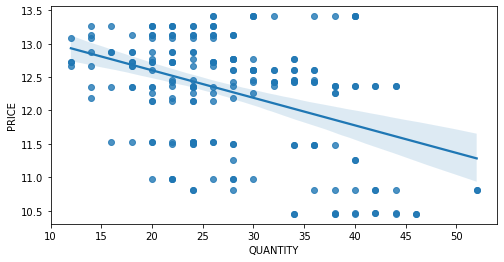

In [45]:
plt.rcParams["figure.figsize"] = (8, 4)
sns.regplot(data = cokedata, x = 'QUANTITY', y = 'PRICE')

In [46]:
lemonadedata.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,YEAR,HOLIDAY,ITEM_NAME
316,1/1/12,12.75,18,2052,2012,New Year,LEMONADE
318,1/2/12,12.75,16,2052,2012,New Year,LEMONADE
320,1/3/12,12.75,12,2052,2012,New Year,LEMONADE
322,2/2/12,12.75,18,2052,2012,Luner New Year,LEMONADE
324,2/3/12,12.75,16,2052,2012,Luner New Year,LEMONADE


<AxesSubplot:xlabel='QUANTITY', ylabel='PRICE'>

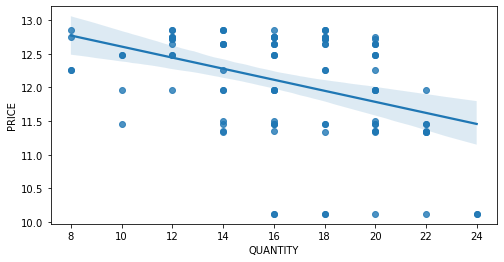

In [47]:
plt.rcParams["figure.figsize"] = (8, 4)
sns.regplot(data = lemonadedata, x = 'QUANTITY', y = 'PRICE')

In [51]:
dt_burgers = DecisionTreeRegressor(max_depth = 4, random_state = 1)
x = burgersdata[['PRICE']]
y = burgersdata['QUANTITY']
dt_burgers.fit(x,y)


DecisionTreeRegressor(max_depth=4, random_state=1)

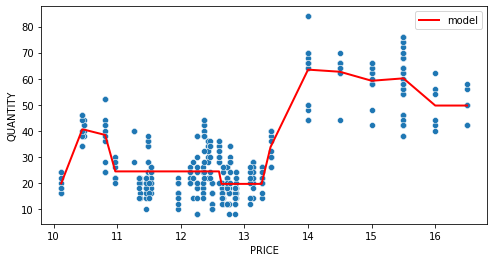

In [52]:
sns.scatterplot(x='PRICE', y= 'QUANTITY',data = burgersdata)
plt.plot(burgersdata['PRICE'].sort_values(), dt_burgers.predict(burgersdata['PRICE'].sort_values().to_frame()),
         color='red', label='model', linewidth=2)
plt.legend()
plt.show()

In [53]:
dt_coffee = DecisionTreeRegressor(max_depth = 4, random_state = 1)
x = coffeedata[['PRICE']]
y = coffeedata['QUANTITY']
dt_coffee.fit(x,y)

DecisionTreeRegressor(max_depth=4, random_state=1)

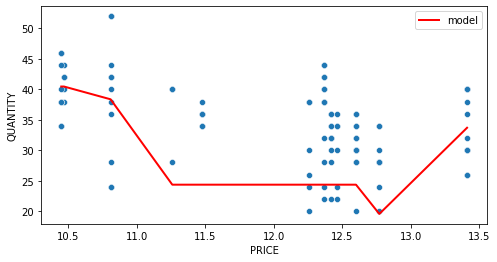

In [54]:
sns.scatterplot(x='PRICE', y= 'QUANTITY',data = coffeedata)
plt.plot(coffeedata['PRICE'].sort_values(), dt_burgers.predict(coffeedata['PRICE'].sort_values().to_frame()),
         color='red', label='model', linewidth=2)
plt.legend()
plt.show()

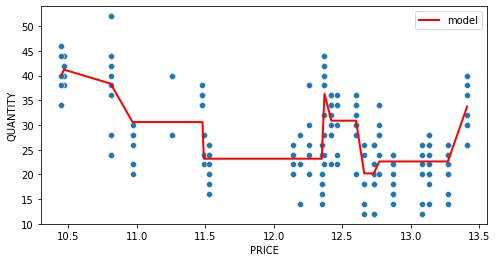

In [55]:
dt_coke = DecisionTreeRegressor(max_depth = 4, random_state = 1)
x = cokedata[['PRICE']]
y = cokedata['QUANTITY']
dt_coke.fit(x,y)

sns.scatterplot(x='PRICE', y= 'QUANTITY',data = cokedata)
plt.plot(cokedata['PRICE'].sort_values(), dt_coke.predict(cokedata['PRICE'].sort_values().to_frame()),
         color='red', label='model', linewidth=2)
plt.legend()
plt.show()


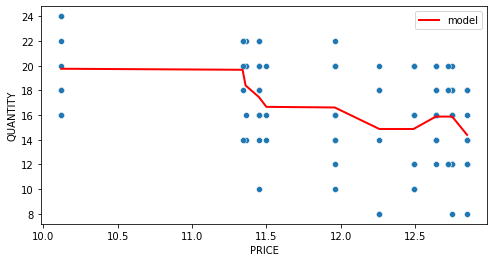

In [56]:
dt_lemonade = DecisionTreeRegressor(max_depth = 4, random_state = 1)
x = lemonadedata[['PRICE']]
y = lemonadedata['QUANTITY']
dt_lemonade.fit(x,y)

sns.scatterplot(x='PRICE', y= 'QUANTITY',data = lemonadedata)
plt.plot(lemonadedata['PRICE'].sort_values(), dt_lemonade.predict(lemonadedata['PRICE'].sort_values().to_frame()),
         color='red', label='model', linewidth=2)
plt.legend()
plt.show()


In [57]:

def price_elasticity(data):
    x = data[['PRICE']]
    y = data['QUANTITY']
    
    dt_elasticity = DecisionTreeRegressor(max_depth = 4, random_state = 1)
    dt_elasticity.fit(x,y)
    price_elasticity = dt_elasticity.feature_importances_
    return price_elasticity, dt_elasticity


def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test[['PRICE']])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit


In [58]:
elasticity_burgers, model_burgers, = price_elasticity(burgersdata)
print("Price Elasticity Burgers:", elasticity_burgers, "Model Burgers:", model_burgers)

elasticity_coffee, model_coffee = price_elasticity(coffeedata)
print("Price Elasticity Coffee:", elasticity_coffee, "Model Coffee:", model_coffee)

elasticity_coke, model_coke = price_elasticity(cokedata)
print("Price Elasticity Coke:", elasticity_coke, "Model Coke:",model_coke)

elasticity_lemonade, model_lemonade = price_elasticity(lemonadedata)
print("Price Elasticity Lemonade:", elasticity_lemonade, "Model Lemonade:",model_lemonade)


Price Elasticity Burgers: [1.] Model Burgers: DecisionTreeRegressor(max_depth=4, random_state=1)
Price Elasticity Coffee: [1.] Model Coffee: DecisionTreeRegressor(max_depth=4, random_state=1)
Price Elasticity Coke: [1.] Model Coke: DecisionTreeRegressor(max_depth=4, random_state=1)
Price Elasticity Lemonade: [1.] Model Lemonade: DecisionTreeRegressor(max_depth=4, random_state=1)


In [59]:
optimal_price = {}
buying_price = 2
optimal_price['burgers'] = find_optimal_price(burgersdata, model_burgers, buying_price)
optimal_price

{'burgers':       PRICE   QUANTITY      PROFIT
 1099  20.11  49.666667  899.463333}

In [60]:
optimal_price = {}
buying_price = 12
optimal_price['coffee'] = find_optimal_price(coffeedata, model_coffee, buying_price)
optimal_price

{'coffee':       PRICE   QUANTITY      PROFIT
 1099  20.44  33.692308  284.363077}

In [61]:
optimal_price = {}
buying_price = 12
optimal_price['coke'] = find_optimal_price(cokedata, model_coke, buying_price)
optimal_price

{'coke':       PRICE   QUANTITY      PROFIT
 1099  20.44  33.692308  284.363077}

In [62]:
optimal_price = {}
buying_price = 12
optimal_price['lemonade'] = find_optimal_price(lemonadedata, model_lemonade, buying_price)
optimal_price

{'lemonade':       PRICE  QUANTITY   PROFIT
 1099  20.11      14.4  116.784}